# SIGNATURE VERIFICATION




In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
config =tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys
from PIL import Image
sys.modules['Image'] = Image

In [2]:
DATADIR = "data/train"   # TRAIN DATASET
VALDIR = "data/test"     # TEST DATASET

In [3]:
IMG_SIZE=28

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D((64),(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3),padding='same'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D((64),(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D((64),(2,2),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense((64),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [5]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                   DATADIR,
                   target_size=(28,28),
                   batch_size=20,
                   class_mode='binary')


val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
                   VALDIR,
                   target_size=(28,28),
                   batch_size=20,
                   class_mode='binary')

Found 720 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [7]:
history= model.fit(train_generator,validation_data=val_generator,epochs=14)

Epoch 1/14
36/36 [==============================] - 8s 205ms/step - loss: 0.6960 - accuracy: 0.5246 - val_loss: 0.6914 - val_accuracy: 0.5033
Epoch 2/14
36/36 [==============================] - 7s 189ms/step - loss: 0.6945 - accuracy: 0.4940 - val_loss: 0.6917 - val_accuracy: 0.5433
Epoch 3/14
36/36 [==============================] - 7s 187ms/step - loss: 0.6911 - accuracy: 0.5258 - val_loss: 0.6875 - val_accuracy: 0.5233
Epoch 4/14
36/36 [==============================] - 7s 188ms/step - loss: 0.6871 - accuracy: 0.5483 - val_loss: 0.6819 - val_accuracy: 0.5767
Epoch 5/14
36/36 [==============================] - 7s 189ms/step - loss: 0.6817 - accuracy: 0.5477 - val_loss: 0.6633 - val_accuracy: 0.6400
Epoch 6/14
36/36 [==============================] - 7s 191ms/step - loss: 0.6665 - accuracy: 0.5766 - val_loss: 0.6430 - val_accuracy: 0.6133
Epoch 7/14
36/36 [==============================] - 7s 178ms/step - loss: 0.6398 - accuracy: 0.6229 - val_loss: 0.6146 - val_accuracy: 0.5967
Epoch 

In [8]:
print("Overall Training Loss and Accuracy")
model.evaluate(train_generator)

Overall Training Loss and Accuracy
36/36 [==============================] - 4s 113ms/step - loss: 0.1809 - accuracy: 0.9181


[0.18090052902698517, 0.918055534362793]

In [9]:
print("Overall Validation Loss and Accuracy")
model.evaluate(val_generator)

Overall Validation Loss and Accuracy
15/15 [==============================] - 3s 185ms/step - loss: 0.1900 - accuracy: 0.9133


[0.19000303745269775, 0.9133333563804626]

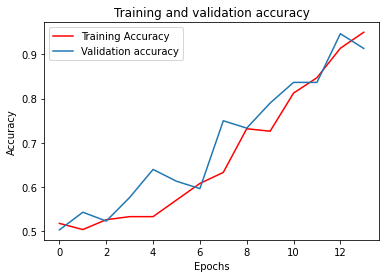

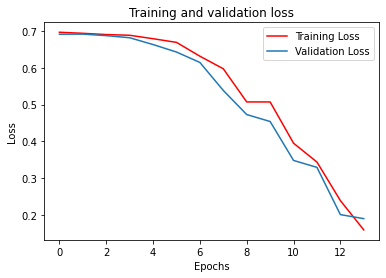

In [10]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot  ( epochs,     acc ,'r', label= 'Training Accuracy')
plt.plot  ( epochs, val_acc, label='Validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot  ( epochs,     loss ,'r', label= 'Training Loss' )
plt.plot  ( epochs, val_loss , label= 'Validation Loss')
plt.title ('Training and validation loss'   )
plt.legend()

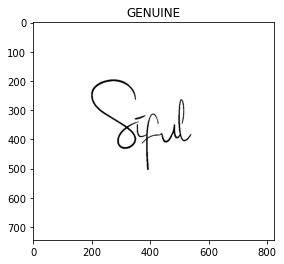

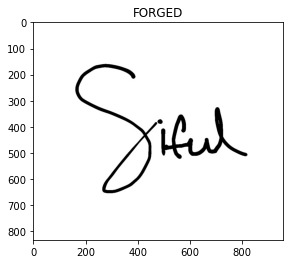

In [11]:
genuine = cv2.imread("data/test/genuine/22.jpeg")
forged = cv2.imread("data/test/forged/22.jpeg")

plt.title("GENUINE")
plt.imshow(genuine)
plt.show()

plt.title("FORGED")
plt.imshow(forged)
plt.show()

genuine


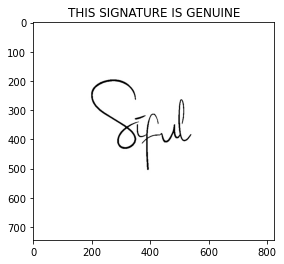

In [12]:
model.save=("signature.h5")

from tensorflow.keras.preprocessing import image
pic="data/sr.jpeg"
image1=image.load_img(pic)                    
image1=image1.resize((28,28))
image1=image.img_to_array(image1)
image1=np.expand_dims(image1,axis=0)
result=model.predict(image1)
if result[0][0] == 1:
    prediction = 'genuine'
    print(prediction)
    genuine = cv2.imread(pic)
    plt.title("THIS SIGNATURE IS GENUINE")
    plt.imshow(genuine)
    plt.show()
else:
    prediction = 'forged'
    print(prediction)
    forged = cv2.imread(pic)
    plt.title("THIS SIGNATURE IS FORGED")
    plt.imshow(forged)
    plt.show()